In [125]:
# 1. Crie uma coluna chamada "dormitory_type"

# Se o valor da coluna "bedrooms" for igual a 1 ---> "studio"
# Se o valor da coluna "bedrooms" for igual a 2 ---> "apartment"
# Se o valor da coluna "bedrooms" for maior que 2 ---> "house"

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data = pd.read_csv('C:\PycharmProjects\Curso_Python_Zero_DS\datasets\kc_house_data.csv')

In [126]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650    1.00           0     0     ...          7        1180   
1      7242    2.00           0     0     ...          7        2170   
2     10000    1.00           0     0     ...          6         770   
3      5000    1.00           0     0     ...          7        1050   
4      8080    1.00           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
0              0      1955             0    98178 47.51 -122.26   
1            400      1951          1991    98125 47.72 -122.32   
2              0      1933             0    98028 47.74 -122.23   
3            910      1965             0    98136 47.52 -122.39   
4              0      1987             0    98074 47.62 -122.05   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [127]:
data['dormitory_type'] = 'type'
data.loc[data['bedrooms'] <= 1, 'dormitory_type'] = 'studio'
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'

print(data[['id', 'bedrooms', 'dormitory_type']])

               id  bedrooms dormitory_type
0      7129300520         3          house
1      6414100192         3          house
2      5631500400         2      apartment
3      2487200875         4          house
4      1954400510         3          house
5      7237550310         4          house
6      1321400060         3          house
7      2008000270         3          house
8      2414600126         3          house
9      3793500160         3          house
10     1736800520         3          house
11     9212900260         2      apartment
12      114101516         3          house
13     6054650070         3          house
14     1175000570         5          house
15     9297300055         4          house
16     1875500060         3          house
17     6865200140         4          house
18       16000397         2      apartment
19     7983200060         3          house
20     6300500875         4          house
21     2524049179         3          house
22     7137

    bedrooms         price
0          0    5323550.00
1          1   63210934.00
2          2 1107788602.00
3          3 4580263939.00
4          4 4372957028.00
5          5 1259346326.00
6          6  224541613.00
7          7   36145017.00
8          8   14366000.00
9          9    5363999.00
10        10    2458000.00
11        11     520000.00
12        33     640000.00


<BarContainer object of 13 artists>

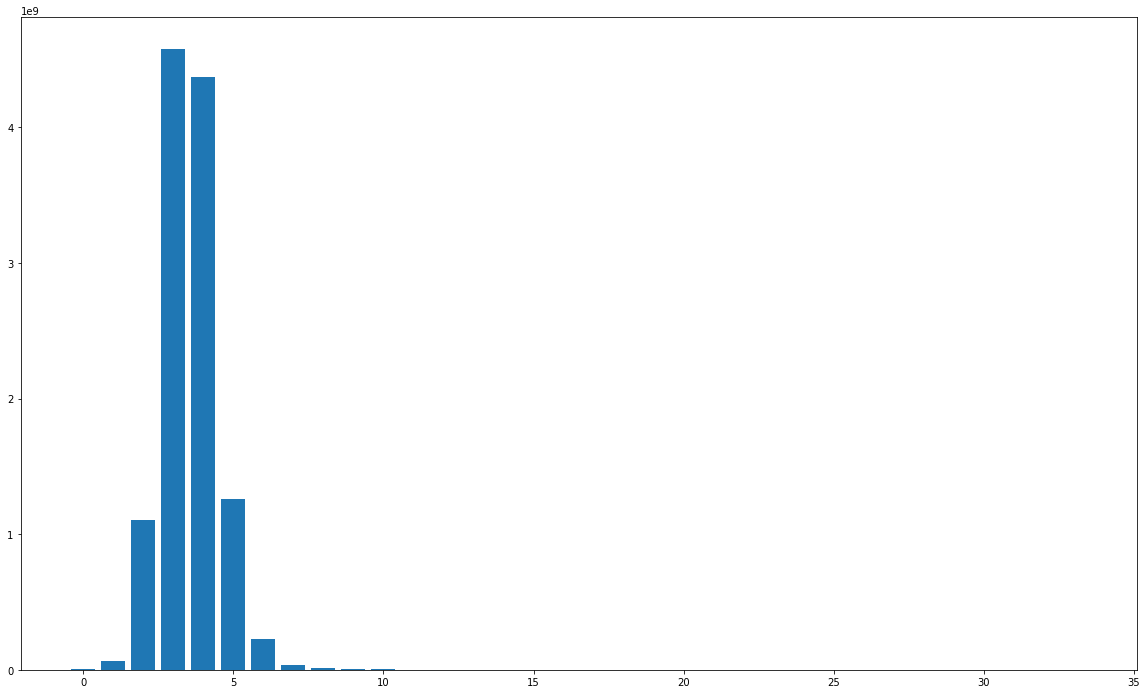

In [128]:
# 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

from matplotlib import pyplot as plt

by_price = data[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
print(by_price)

plt.figure(figsize=(20,12))
plt.bar(by_price['bedrooms'], by_price['price'])

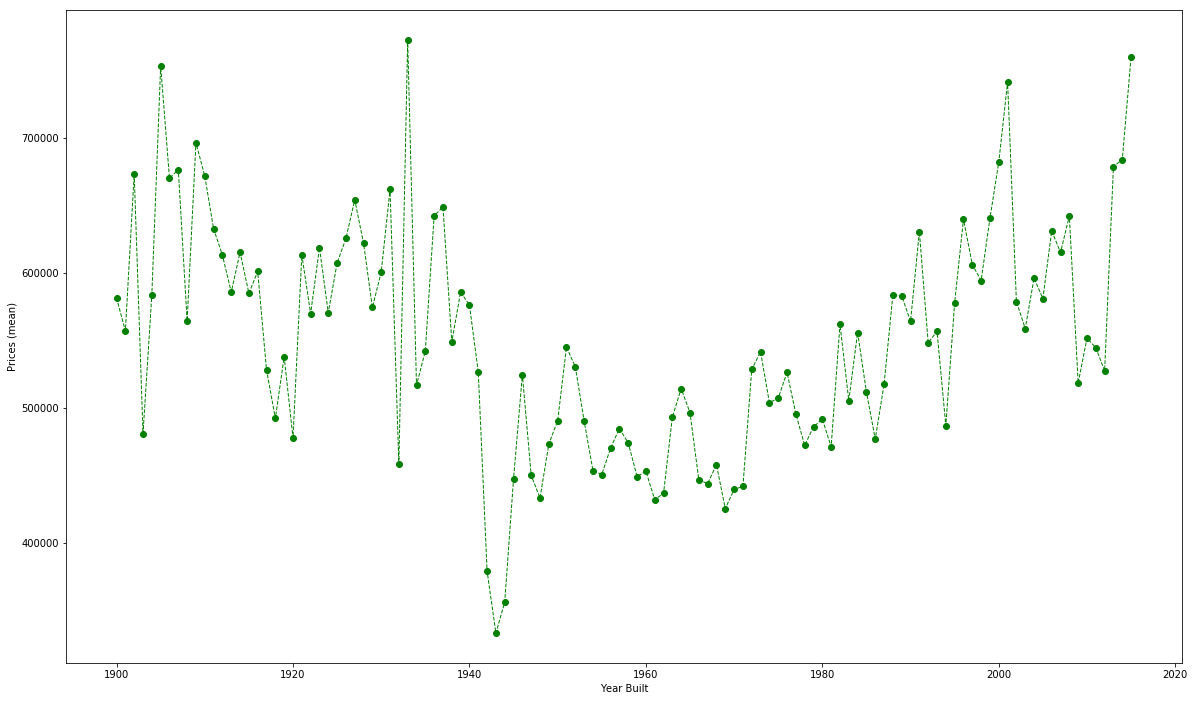

In [129]:
# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis

price_mean = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(20,12))
plt.xlabel('Year Built')
plt.ylabel('Prices (mean)')
plt.plot(price_mean['yr_built'], price_mean['price'], 'go--', linewidth=1, markersize=6)

  dormitory_type     price
0      apartment 401372.68
1          house 563092.21
2         studio 323275.87


<BarContainer object of 3 artists>

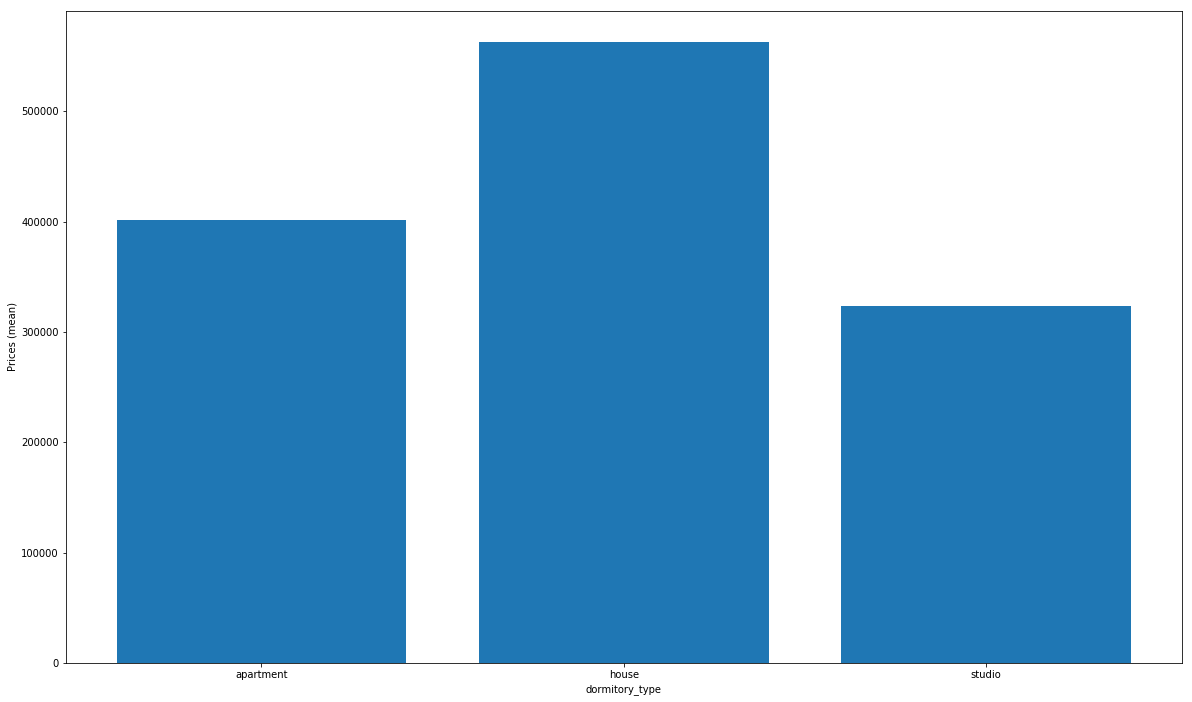

In [130]:
# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

by_dtype = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
print(by_dtype)

plt.figure(figsize=(20,12))
plt.xlabel('dormitory_type')
plt.ylabel('Prices (mean)')
plt.bar(by_dtype['dormitory_type'], by_dtype['price'])

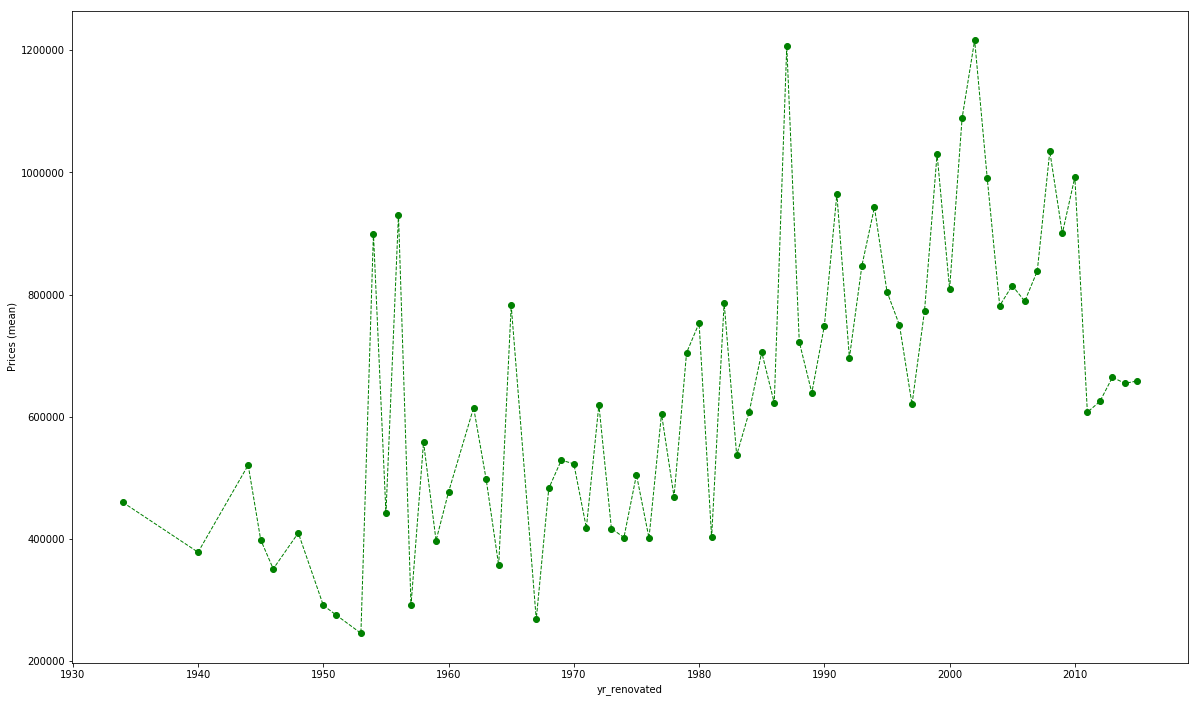

In [131]:
# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano de reforma dos imóveis, a partir de 1930

year = data[data['yr_renovated'] >= 1930]

dyear = year[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
plt.figure(figsize=(20,12))
plt.xlabel('yr_renovated')
plt.ylabel('Prices (mean)')
plt.plot(dyear['yr_renovated'], dyear['price'], 'go--', linewidth=1, markersize=6)


In [132]:
# 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo do dormitórios dos imóveis

data[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean()

price
yr_built dormitory_type          
1900     apartment      589533.33
         house          584854.27
         studio         398944.00
1901     apartment      452856.40
         house          578619.17
1902     apartment      511850.00
         house          709634.09
1903     apartment      455959.20
         house          496985.29
         studio         170000.00
1904     apartment      450085.83
         house          672870.52
1905     apartment      470928.57
         house          842673.18
         studio         365000.00
1906     apartment      451517.08
         house          768908.36
         studio         393750.00
1907     apartment      461496.15
         house          755046.35
         studio         320000.00
1908     apartment      449093.95
         house          616400.23
         studio         375650.00
1909     apartment      456548.54
         house          787741.81
1910     apartment      457297.14
         house          777163.36
         studio         407325.00
1911     apartment      406766.67
...                           ...
2004     house          618613.18
2005     apartment      425879.21
         house          610322.16
2006     apartment      457948.89
         house          666709.25
         studio         362000.00
2007     apartment      463989.44
         house          656898.58
         studio         253083.33
2008     apartment      411294.40
         house          698690.12
         studio         337250.00
2009     apartment      469262.22
         house          532021.87
         studio         382500.00
2010     apartment      500988.46
         house          556692.68
2011     apartment      542488.18
         house          546699.07
         studio         310000.00
2012     apartment      477755.77
         house          531561.92
2013     apartment      429441.43
         house          687533.74
2014     apartment      519182.54
         house          692687.72
         studio         516500.00
2015     apartment      543250.00
         house          797383.06
         studio         385195.00

[309 rows x 1 columns]

<BarContainer object of 3 artists>

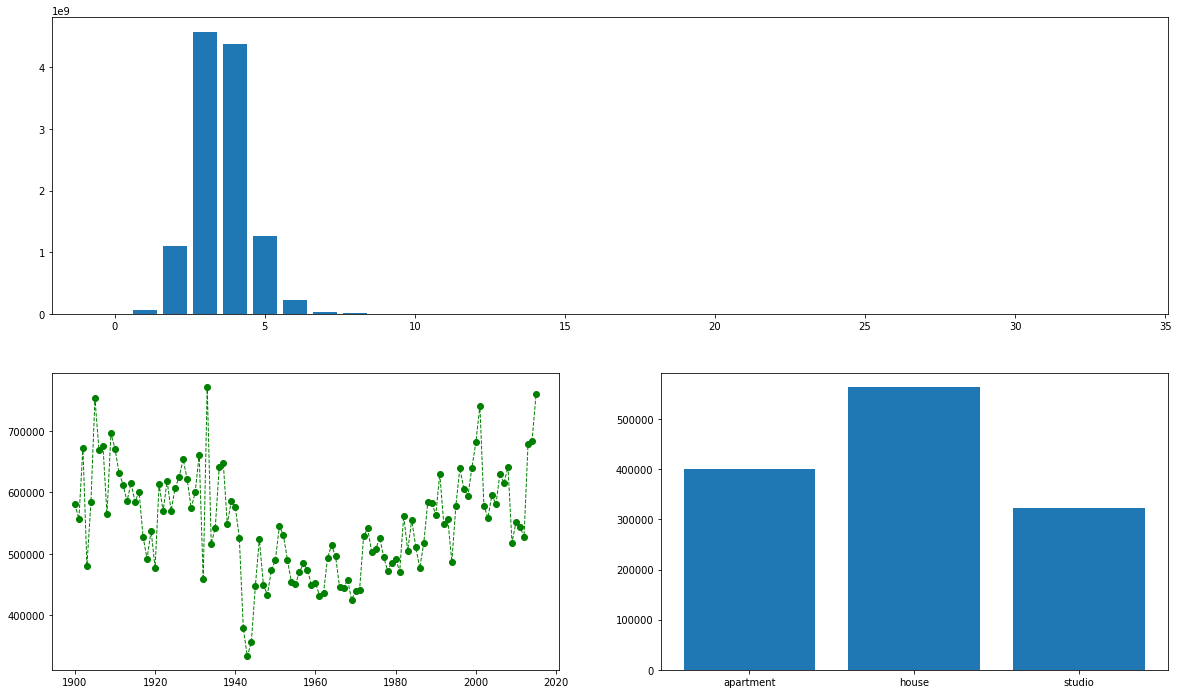

In [133]:
# 7. Crie um dashboard com os gráficos das questões 02,03,04 (2 linha e 2 colunas)

from matplotlib import gridspec

fig = plt.figure(figsize=(20,12)) # Configura o tamanho da figura na tela do dashboard
specs = gridspec.GridSpec(ncols=2, nrows=2,figure=fig) # Define como o dashboard será divido na tela

ax1 = fig.add_subplot(specs[0,:])  # First Row
ax2 = fig.add_subplot(specs[1, 0])  # First Row - First Column
ax3 = fig.add_subplot(specs[1, 1])  # Second Row - Second Column

# First Graph

by_price = data[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
ax1.bar(by_price['bedrooms'], by_price['price'])

# Second Graph

price_mean = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax2.plot(price_mean['yr_built'], price_mean['price'], 'go--', linewidth=1, markersize=6)

# Third Graph

by_dtype = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(by_dtype['dormitory_type'], by_dtype['price'])

<BarContainer object of 3 artists>

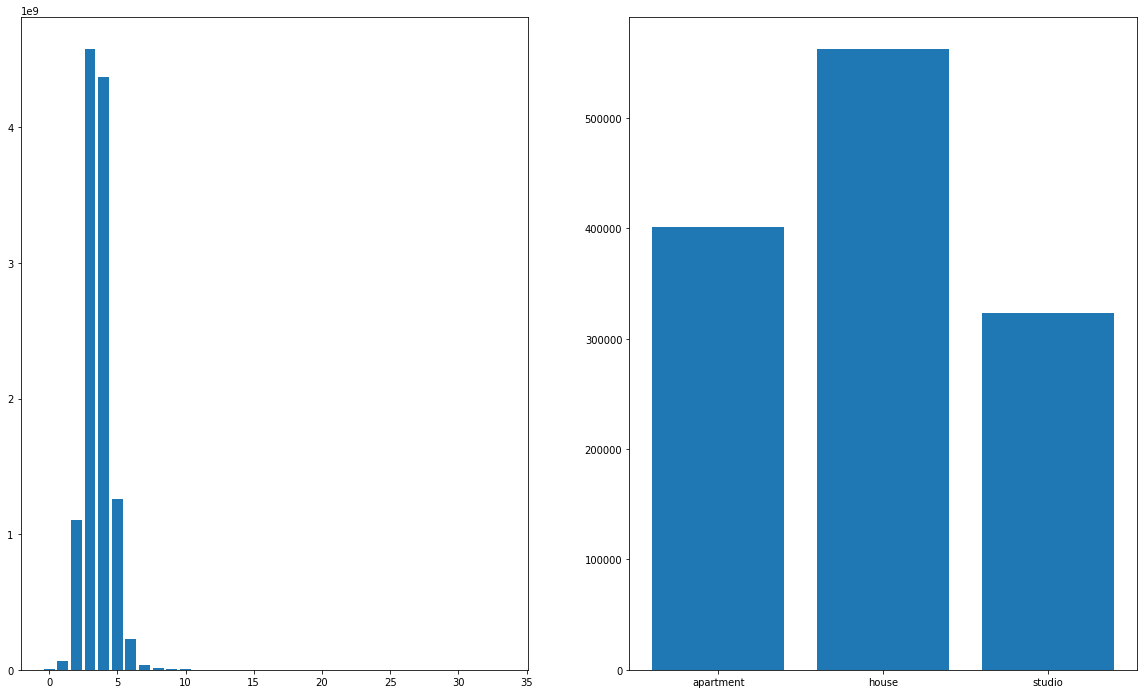

In [134]:
# 8. Crie um dashboard com os gráficos das questões 02,04 (2 colunas)

from matplotlib import gridspec

fig = plt.figure(figsize=(20,12)) # Configura o tamanho da figura na tela do dashboard
specs = gridspec.GridSpec(ncols=2, nrows=1,figure=fig) # Define como o dashboard será divido na tela

ax1 = fig.add_subplot(specs[0,0])  # First Row - First Column
ax2 = fig.add_subplot(specs[0,1])  # First Row - Second Column

# First Graph

by_price = data[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
ax1.bar(by_price['bedrooms'], by_price['price'])

# Third Graph

by_dtype = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax2.bar(by_dtype['dormitory_type'], by_dtype['price'])

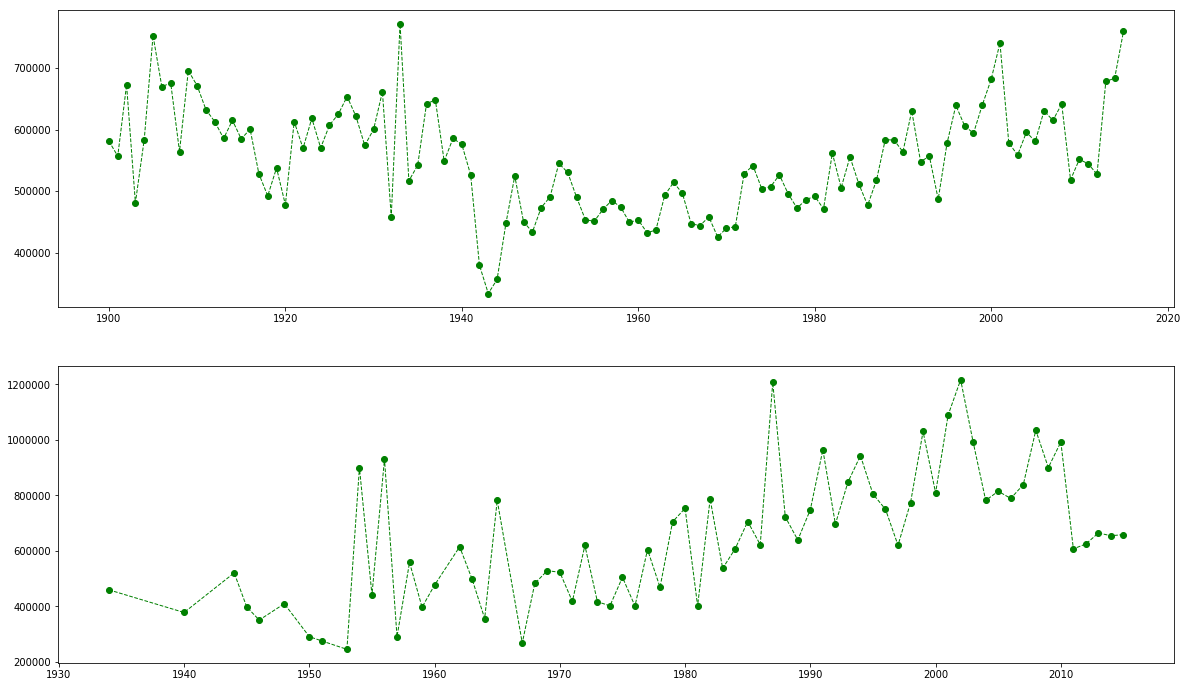

In [139]:
# 9. Crie um dashboard com os gráficos das questões 03 e 05 (2 linhas)

from matplotlib import gridspec

fig = plt.figure(figsize=(20,12)) # Configura o tamanho da figura na tela do dashboard
specs = gridspec.GridSpec(ncols=1, nrows=2,figure=fig) # Define como o dashboard será divido na tela

ax1 = fig.add_subplot(specs[0,0])  # First Row - First Column
ax2 = fig.add_subplot(specs[1,0])  # First Row - Second Column

# First Graph

price_mean = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(price_mean['yr_built'], price_mean['price'], 'go--', linewidth=1, markersize=6)

# Third Graph

year = data[data['yr_renovated'] >= 1930]

dyear = year[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(dyear['yr_renovated'], dyear['price'], 'go--', linewidth=1, markersize=6)


In [140]:
# Faça um gráfico com o tamanho dos pontos no tamanho da sala de estar

import plotly.express as px

houses = data[['id', 'lat','long','sqft_living']]

fig = px.scatter_mapbox(houses,
                        lat = 'lat',
                        lon = 'long',
                        size = 'sqft_living',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10)

fig.update_layout(mapbox_style = 'open-steet-map')
fig.update_layout(height=600, margin={'r':0,'t':0,'l':0,'b':0,})
fig.show()